# **🌳 ÁRBOLES DE DECISIÓN CON EL DATASET IRIS**
**Este notebook muestra cómo entrenar y visualizar un árbol de decisión usando sklearn, y cómo interpretar gráficamente los datos del dataset Iris.**

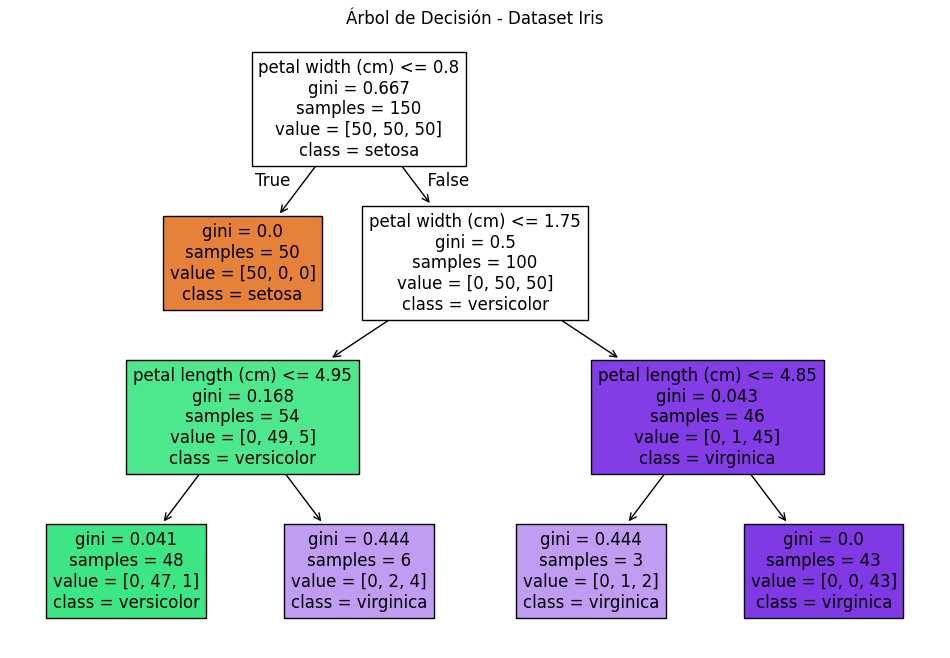

In [3]:
# Paso 1: Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Paso 2: Cargar el dataset Iris
iris = load_iris()

# Variables predictoras (longitudes y anchos de pétalos y sépalos)
X = iris.data

# Variable objetivo (especies de flor)
y = iris.target

# Paso 3: Crear y entrenar el modelo de Árbol de Decisión
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(X, y)

# Paso 4: Visualizar el árbol
plt.figure(figsize=(12, 8))
plot_tree(modelo,
          feature_names=iris.feature_names,
          class_names=iris.target_names.tolist(),
          filled=True)
plt.title("Árbol de Decisión - Dataset Iris")
plt.show()

**LEYENDA**
* Gini: mide la pureza del nodo (0 = puro, 0.5 = 50/50 mezcla).
* Samples: cantidad de flores en ese nodo.
* Value: cantidad de cada clase [Setosa, Versicolor, Virginica].
* Class: predicción de clase en ese nodo.


**🧠 INTERPRETACIÓN DEL ÁRBOL**

* La primera condición del árbol es "petal width <= 0.8".
* Si se cumple, el modelo clasifica la flor como "Setosa" (pura).
* Las flores con petal width > 0.8 se dividen en Versicolor y Virginica.
*A través de más condiciones basadas en el largo del pétalo, se alcanza una
* El árbol utiliza condiciones simples para predecir la clase de cada flor.

In [8]:
# Importa la librería pandas para trabajar con DataFrames
import pandas as pd

# Crea un DataFrame con los datos del dataset Iris
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Agrega una columna 'target' con las clases numéricas (0, 1, 2)
df['target'] = iris.target

# Agrega una columna 'species' con los nombres de las especies
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<ipython-input-10-0c39fdc8c7bb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='petal width (cm)', y='species', inner='stick', palette='Dark2')


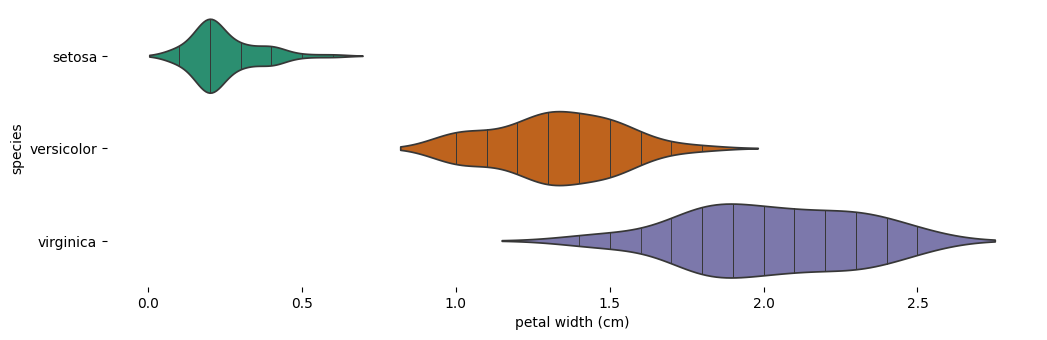

In [10]:
# @title species vs petal width (cm)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='petal width (cm)', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

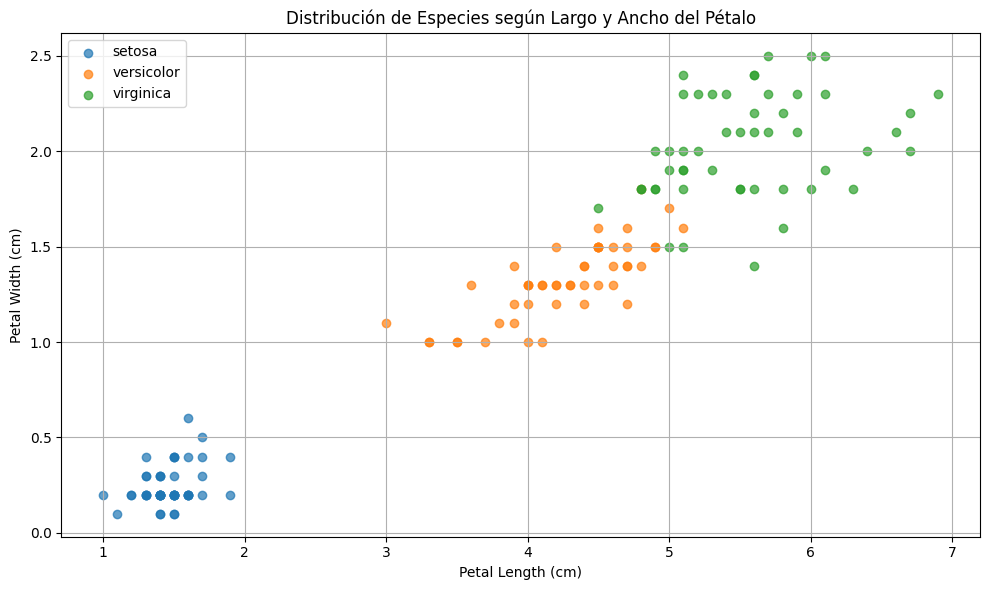

In [9]:
# Crea una figura de tamaño 10x6 pulgadas para el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Recorre cada especie única y grafica sus puntos de pétalo
for species in df['species'].unique():
    subset = df[df['species'] == species]  # Filtra las filas de esa especie
    plt.scatter(
        subset['petal length (cm)'],       # Eje X: Largo del pétalo
        subset['petal width (cm)'],        # Eje Y: Ancho del pétalo
        label=species,                     # Etiqueta para la leyenda
        alpha=0.7                          # Transparencia para superposición
    )

# Etiquetas de los ejes
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Título del gráfico
plt.title('Distribución de Especies según Largo y Ancho del Pétalo')

# Muestra la leyenda con los nombres de las especies
plt.legend()

# Activa la cuadrícula de fondo
plt.grid(True)

# Ajusta los márgenes del gráfico
plt.tight_layout()

# Muestra el gráfico final
plt.show()